140.0


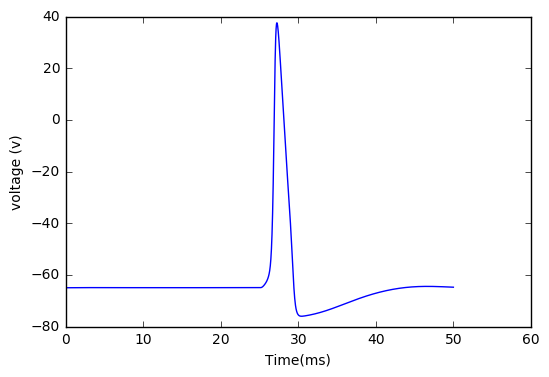

In [15]:
from neuron import h
import matplotlib.pyplot as plt 
#matplotlib inline
axon1 = h.Section()
axon1.insert('hh')

print axon1.nao
v_init=-65
def initialize():
	h.finitialize(v_init)
	
def integrate():
	while h.t<tstop:	
		h.fadvance()

nseg=99 

dia=500	       # diameter of the axon in um 
axon1.L=20000  # length of axon section in um
axon1.diam=dia
axon1.nseg=nseg

stim1=h.IClamp(0,sec=axon1)
stim1.delay=25 #ms
stim1.dur=1 #ms
stim1.amp=2000 #nA

tstop=50

h.dt=0.025 

vec = {}
vec['v_0.5']=h.Vector()
vec['v_0.5'].record(axon1(0.5)._ref_v)
vec['t'] = h.Vector()
vec['t'].record(h._ref_t)

initialize()
integrate()

plt.plot(vec['t'],vec['v_0.5'])
plt.xlabel('Time(ms)')
plt.ylabel('voltage (v)')
plt.show()